## 1 - Abstract: 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

- default: has credit in default? (categorical: 'no','yes','unknown')

- housing: has housing loan? (categorical: 'no','yes','unknown')

- loan: has personal loan? (categorical: 'no','yes','unknown')

- contact: contact communication type (categorical: 'cellular','telephone') 

- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- previous: number of contacts performed before this campaign and for this client (numeric)

- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

- emp.var.rate: employment variation rate - quarterly indicator (numeric)

- cons.price.idx: consumer price index - monthly indicator (numeric) 

- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

- euribor3m: euribor 3 month rate - daily indicator (numeric)

- nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')




In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import jenkspy
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_bank_full_data = pd.read_csv("../data/bank-additional/bank-additional-full.csv", sep=";")

In [3]:
df_bank_full_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

## Dataset schema 
- We can see there is no missing data in the dataset.

In [4]:
df_bank_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
df_bank_full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df_bank_full_data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

## 2) Feature Engineering



### 2.1) Convert Numerical Attribute to categorical attribute

In [7]:
def get_jenks_labels(jenk_break_list):
    label_list = []
    for i in range(len(jenk_break_list) -1):
        try:
            label_list.append(str(int(jenk_break_list[i]))+"-"+str(int(jenk_break_list[i+1])))
        except:
            pass
    return label_list

In [8]:
df_bank_full_data.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [9]:
def get_numerical_to_categorical(col):
    jenk_break_list = jenkspy.jenks_breaks(df_bank_full_data[col], nb_class=4)
    jenk_labels = get_jenks_labels(jenk_break_list)
    print(jenk_break_list)
    df_bank_full_data['d_'+ col] = pd.cut(x=df_bank_full_data[col], bins=jenk_break_list, labels=jenk_labels, duplicates='drop')

In [10]:
get_numerical_to_categorical('age')
get_numerical_to_categorical('campaign')
get_numerical_to_categorical('pdays')
get_numerical_to_categorical('emp.var.rate')
get_numerical_to_categorical('cons.price.idx')
get_numerical_to_categorical('cons.conf.idx')
get_numerical_to_categorical('euribor3m')
get_numerical_to_categorical('nr.employed')

[17.0, 33.0, 42.0, 53.0, 98.0]
[1.0, 2.0, 6.0, 15.0, 56.0]
[0.0, 4.0, 9.0, 27.0, 999.0]
[-3.4, -2.9, -1.1, -0.1, 1.4]
[92.20100000000001, 92.963, 93.444, 94.215, 94.76700000000001]
[-50.8, -45.9, -39.8, -33.6, -26.9]
[0.634, 1.0590000000000002, 1.811, 4.474, 5.045]
[4963.6, 5023.5, 5099.1, 5195.8, 5228.1]


In [11]:
df_bank_full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'd_age', 'd_campaign',
       'd_pdays', 'd_emp.var.rate', 'd_cons.price.idx', 'd_cons.conf.idx',
       'd_euribor3m', 'd_nr.employed'],
      dtype='object')

In [12]:
X = df_bank_full_data[['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'd_age', 'd_campaign',
       'd_pdays', 'd_emp.var.rate', 'd_cons.price.idx', 'd_cons.conf.idx',
       'd_euribor3m', 'd_nr.employed']]

y = df_bank_full_data.y


## Feature Selection 


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X.astype(str)
 
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

# feature selection
def select_features(X_train, y_train, X_test, n_top_features='all'):
    fs = SelectKBest(score_func=chi2, k=n_top_features)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

Feature-0 (job) 53.231142900938224
Feature-1 (marital) 20.851198324845434
Feature-2 (education) 109.03780721462074
Feature-3 (default) 202.28113882753107
Feature-4 (housing) 2.0320538195031
Feature-5 (loan) 0.09568932913672833
Feature-6 (contact) 331.96837073455896
Feature-7 (month) 0.1677442039814912
Feature-8 (day_of_week) 13.532245295731038
Feature-9 (d_age) 1.957764060419084
Feature-10 (d_campaign) 17.38310312361895
Feature-11 (d_pdays) 9.844719833345065
Feature-12 (d_emp.var.rate) 152.48508808209107
Feature-13 (d_cons.price.idx) 76.87035219981567
Feature-14 (d_cons.conf.idx) 17.603424457254043
Feature-15 (d_euribor3m) 1646.916839919976
Feature-16 (d_nr.employed) 724.0671125885253


<IPython.core.display.Javascript object>


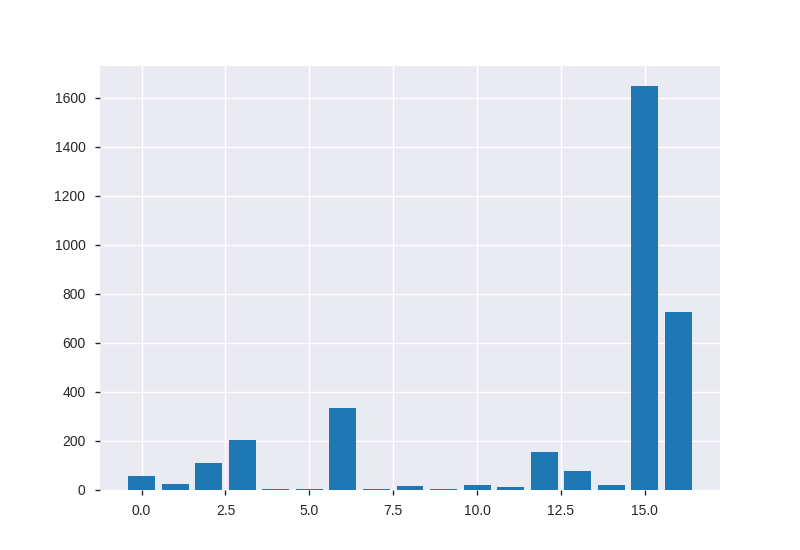

In [14]:
%matplotlib notebook
feature_name = X.columns

import matplotlib.pyplot as plt
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature-{} ({}) {}'.format (i, feature_name[i],  fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Model Building using XGBoost

In [15]:
X.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'd_age', 'd_campaign', 'd_pdays',
       'd_emp.var.rate', 'd_cons.price.idx', 'd_cons.conf.idx', 'd_euribor3m',
       'd_nr.employed'],
      dtype='object')

### Convert all columns into one-hot encoder Format

In [16]:
## Convert Train columns to one-hot encoding format
X_one_hot = X.copy()
for col in X_one_hot.columns:
    X_one_hot = pd.concat([X_one_hot,pd.get_dummies(X_one_hot[col])], axis=1)
    X_one_hot = X_one_hot.drop(columns=[col]) #column no longer needed

In [17]:
X_one_hot.columns = ['C_'+str(i) for i in range(90)]

In [ ]:
le = LabelEncoder()
le.fit(y)
y_target = le.transform(y)

## TSNE plot

<IPython.core.display.Javascript object>


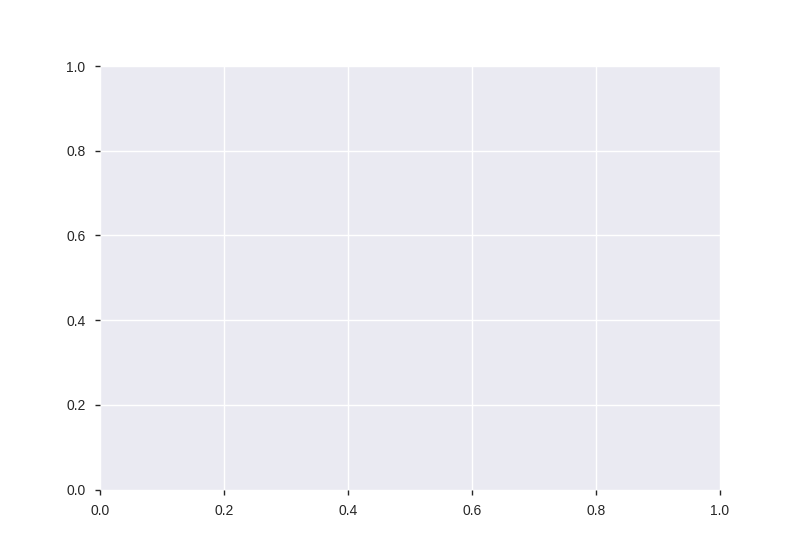

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

In [45]:
%matplotlib notebook
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt

embeddings = TSNE(n_jobs=4).fit_transform(X_one_hot.values)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]


In [63]:
%matplotlib notebook
import plotly
import plotly.express as px

fig = px.scatter(x=vis_x, y=vis_y, color=y_target)
fig.show()

In [64]:
plotly.offline.plot(fig, filename='../static/dashboard_first_chart7.html')

'../static/dashboard_first_chart7.html'